In [ ]:
#kết nối với gg drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import thư viện
import numpy as np
from tensorflow import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
import pickle
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
#load feature đã xử lý và resize từ trước
pickle_in = open("gdrive/MyDrive/emotion/X_emotion.pickle","rb")
x = pickle.load(pickle_in)

In [ ]:
#load feature đã xử lý và resize từ trước
pickle_in = open("gdrive/MyDrive/emotion/y_emotion.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
x.shape

(24612, 48, 48)

In [ ]:
y.shape

(24612,)

0

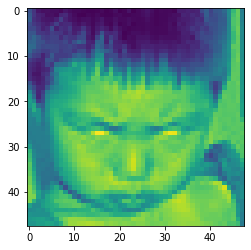

In [ ]:
plt.imshow(x[0])
y[0]

In [ ]:
x = x.reshape(-1,48,48,1)
x.shape

(24612, 48, 48, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
#đưa label vào dạng onehot 
y= to_categorical(y,6)

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
#from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os


In [ ]:
model = Sequential()
# Block-1
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7
model.add(Dense(6,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
hist = model.fit(x, y,batch_size=32,epochs=50,verbose=1,validation_split=(0.1))

Epoch 1/50
693/693 [==============================] - 12s 14ms/step - loss: 1.9426 - accuracy: 0.2593 - val_loss: 3.2966 - val_accuracy: 0.0000e+00
Epoch 2/50
693/693 [==============================] - 9s 13ms/step - loss: 1.4788 - accuracy: 0.3765 - val_loss: 3.4116 - val_accuracy: 0.0333
Epoch 3/50
693/693 [==============================] - 10s 14ms/step - loss: 1.2730 - accuracy: 0.4791 - val_loss: 2.8261 - val_accuracy: 0.0967
Epoch 4/50
693/693 [==============================] - 10s 14ms/step - loss: 1.1762 - accuracy: 0.5299 - val_loss: 2.3149 - val_accuracy: 0.3014
Epoch 5/50
693/693 [==============================] - 9s 14ms/step - loss: 1.0824 - accuracy: 0.5781 - val_loss: 2.6935 - val_accuracy: 0.2644
Epoch 6/50
693/693 [==============================] - 9s 14ms/step - loss: 1.0276 - accuracy: 0.6026 - val_loss: 1.9951 - val_accuracy: 0.4578
Epoch 7/50
693/693 [==============================] - 9s 14ms/step - loss: 0.9737 - accuracy: 0.6284 - val_loss: 2.0732 - val_accuracy:

In [ ]:
#model.save('gdrive/MyDrive/age/saved_model/deadline_linear.h5')
model.save('emotion.h5')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(48, 48))	
	
	return img

[[2.8740629e-04 2.8246097e-07 9.9810284e-01 1.2545588e-03 3.5199584e-04
  2.9697894e-06]]
Fear


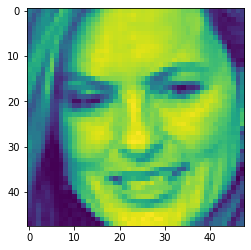

In [ ]:
#test ket qua theo kiểu linear
#nho chuyển y về lại integer
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Surprise']

	# load model
plt.imshow(x[4500].reshape(48,48))
model = load_model('emotion.h5')
	# predict the class
img = img_to_array(x[4500])

img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))])


In [ ]:
y[4500]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

[[0.28239298 0.0036179  0.2174318  0.01449139 0.00876986 0.47329614]]
Sad


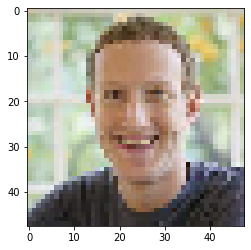

In [ ]:
img = load_image('mark.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))])


[[3.5398785e-02 4.4666714e-04 9.3532425e-01 4.0822357e-04 2.7704773e-02
  7.1733660e-04]]
Fear


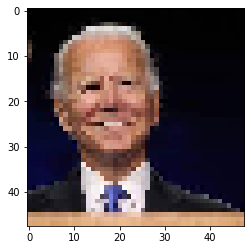

In [ ]:
img = load_image('joe1.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))])

[[2.2075754e-02 7.7714765e-04 9.5204189e-03 1.2882201e-03 9.6600759e-01
  3.3086922e-04]]
Neutral


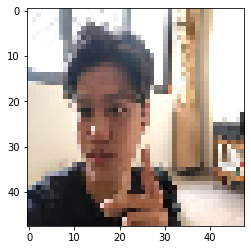

In [ ]:
img = load_image('ming.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))])

[[6.9025031e-04 8.8736278e-06 7.6736294e-04 4.5763730e-04 9.9807203e-01
  3.7970085e-06]]
Neutral


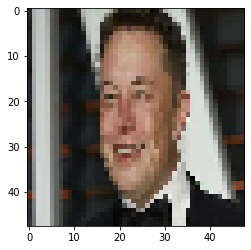

In [ ]:
img = load_image('musk.jpg')


plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))])

ValueError: ignored

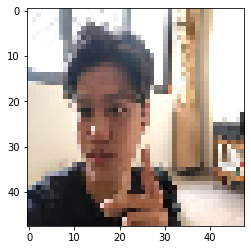

In [ ]:
img = load_image('ming.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result) 

[[0.48719385 0.01394434 0.07476866 0.35198233 0.04000687 0.03210387]]
Angry


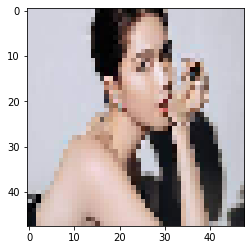

In [ ]:
img = load_image('ngoctrinh.jfif')


plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))])

[[1.9431209e-04 1.2199877e-05 1.5700160e-03 2.2489144e-02 9.7571814e-01
  1.6181677e-05]]
Neutral


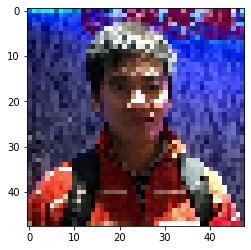

In [ ]:
img = load_image('tho.jpg')


plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))])

[[1.2554965e-04 1.1382253e-06 9.9839979e-01 1.3292643e-04 1.3291952e-03
  1.1379763e-05]]
Fear


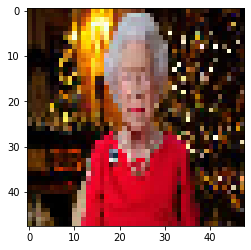

In [ ]:
img = load_image('queen2.jpg')


plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))]) 

[[1.7540789e-03 6.8245487e-07 1.4230798e-04 5.9533265e-04 9.9750489e-01
  2.7159219e-06]]
Neutral


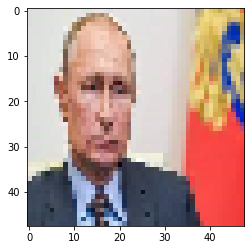

In [ ]:
img = load_image('pu.jpg')


plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,48,48,1)  
result = model.predict(img)
print(result)
print(class_labels[int(np.argmax(result,axis=1))]) 